# Dataset Exploration and Cleaning.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# Replace 'swiggy_restaurant_dataset.csv' with the actual path to your dataset
file_path = 'swiggy.csv'
data = pd.read_csv(file_path)

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Basic Information
print("\nBasic Information:")
print(data.info())

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Step 2: Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Step 3: Check for duplicates
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Dataset Preview:
    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block             56  
2   Double Road   

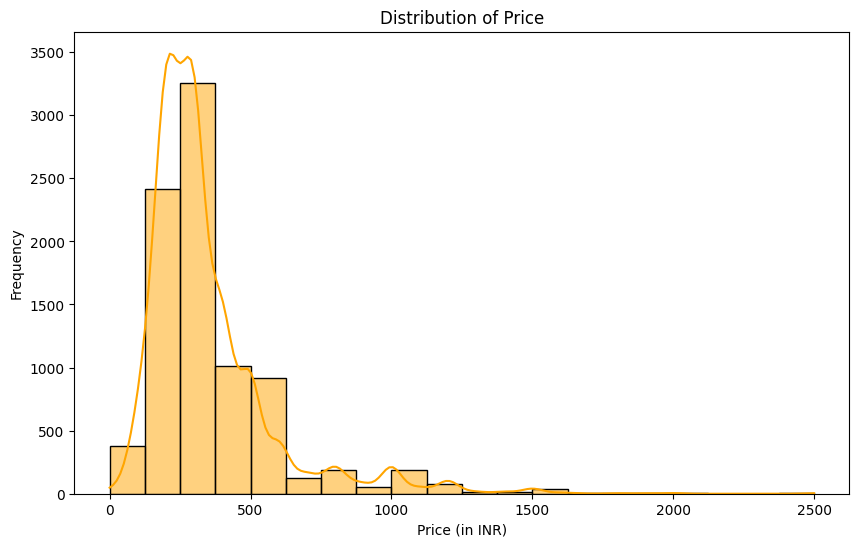

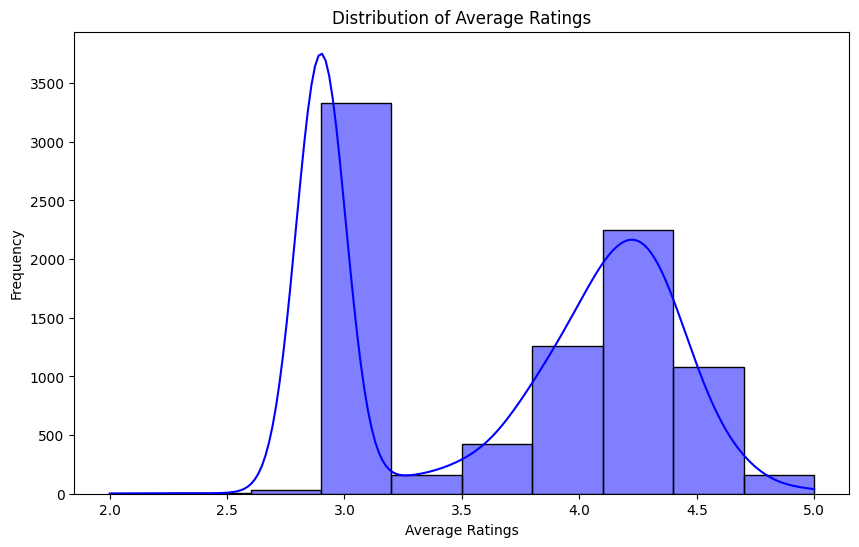

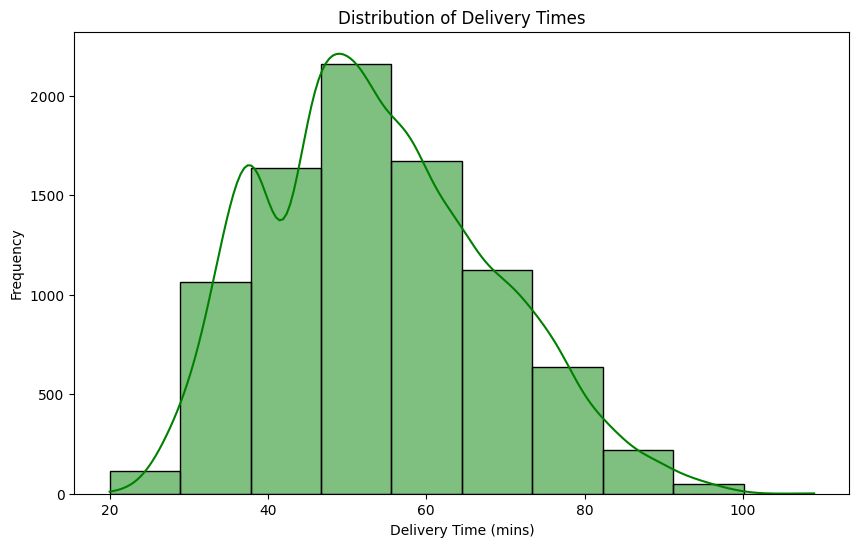


Unique Areas:
833

Unique Cities:
9

Unique Food Types:
['Biryani,Chinese,North Indian,South Indian' 'Mughlai,Lucknowi' 'Chinese'
 ... 'Chinese,Snacks,Tandoor' 'North Indian,Indian,Snacks'
 'Chaat,Snacks,Chinese']


In [8]:
# Step 4: Column-Wise Analysis
# Distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=20, kde=True, color='orange')
plt.title("Distribution of Price")
plt.xlabel("Price (in INR)")
plt.ylabel("Frequency")
plt.show()

# Distribution of 'Avg ratings'
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg ratings'], bins=10, kde=True, color='blue')
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Ratings")
plt.ylabel("Frequency")
plt.show()

# Distribution of 'Delivery time'
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery time'], bins=10, kde=True, color='green')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (mins)")
plt.ylabel("Frequency")
plt.show()

# Analyze categorical data (e.g., Area, City, Food type)
print("\nUnique Areas:")
print(data['Area'].nunique())

print("\nUnique Cities:")
print(data['City'].nunique())

print("\nUnique Food Types:")
print(data['Food type'].unique())


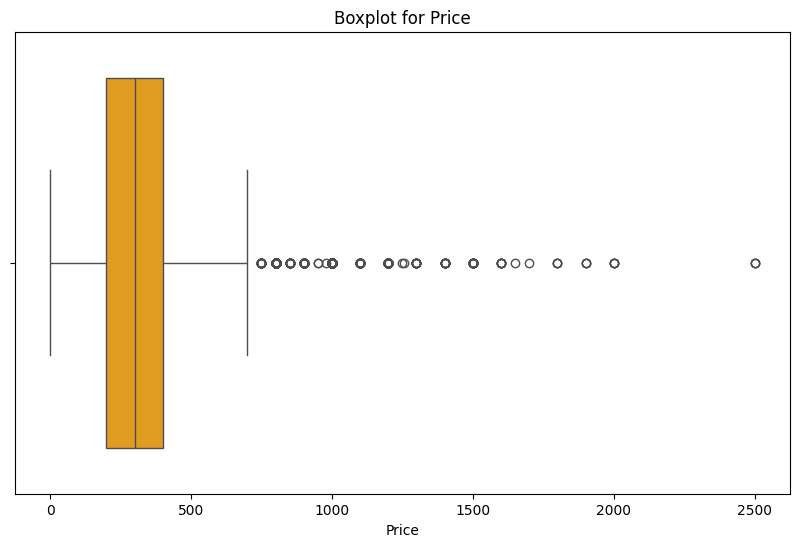

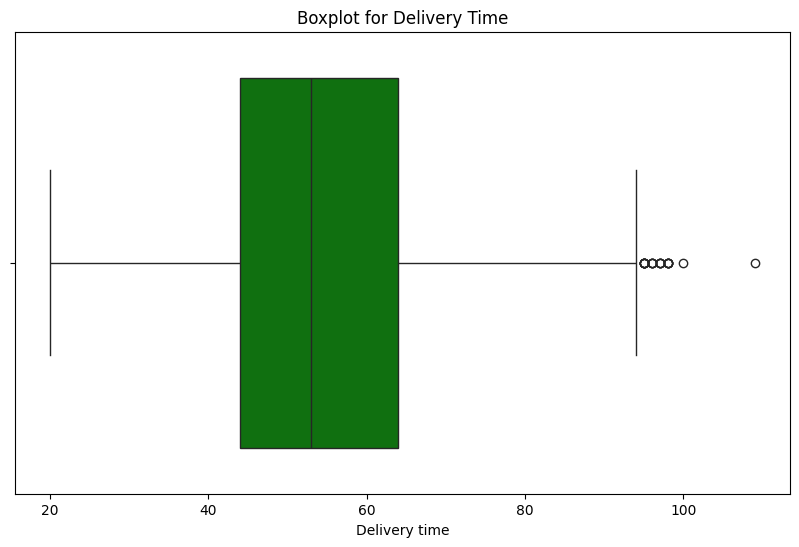

In [9]:
# Step 5: Check for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price'], color='orange')
plt.title("Boxplot for Price")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Delivery time'], color='green')
plt.title("Boxplot for Delivery Time")
plt.show()

# Data Cleaning

In [10]:
import numpy as np

# Step 1: Handle Outliers
print("\nHandling Outliers...")

# Cap extreme values at the 99th percentile for 'Price'
price_cap = data['Price'].quantile(0.99)
data['Price'] = np.where(data['Price'] > price_cap, price_cap, data['Price'])

# Cap extreme values at the 99th percentile for 'Delivery time'
delivery_time_cap = data['Delivery time'].quantile(0.99)
data['Delivery time'] = np.where(data['Delivery time'] > delivery_time_cap, delivery_time_cap, data['Delivery time'])

print(f"Price capped at: {price_cap}")
print(f"Delivery time capped at: {delivery_time_cap}")

# Step 2: Normalize Categorical Columns
print("\nNormalizing Categorical Columns...")

# Clean and standardize categorical columns
data['Food type'] = data['Food type'].str.strip().str.title()
data['Area'] = data['Area'].str.strip().str.title()
data['City'] = data['City'].str.strip().str.title()

# Verify unique values after cleaning
print("\nUnique Food Types After Cleaning:")
print(data['Food type'].unique())

print("\nUnique Areas After Cleaning:")
print(data['Area'].nunique())

print("\nUnique Cities After Cleaning:")
print(data['City'].nunique())

# Step 3: Save Cleaned Dataset
cleaned_file_path = 'swiggy_restaurant_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")



Handling Outliers...
Price capped at: 1200.0
Delivery time capped at: 89.0

Normalizing Categorical Columns...

Unique Food Types After Cleaning:
['Biryani,Chinese,North Indian,South Indian' 'Mughlai,Lucknowi' 'Chinese'
 ... 'Chinese,Snacks,Tandoor' 'North Indian,Indian,Snacks'
 'Chaat,Snacks,Chinese']

Unique Areas After Cleaning:
832

Unique Cities After Cleaning:
9

Cleaned dataset saved to: swiggy_restaurant_cleaned.csv


# Data Ingestion and Storage

In [13]:
# Create SQLite Database and Import Data
import sqlite3
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('swiggy_restaurant_cleaned.csv')

# Connect to SQLite database (it will create the database file if it doesn't exist)
conn = sqlite3.connect('swiggy_data.db')

# Save the DataFrame to the SQLite database
df.to_sql('restaurants', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

print("Data successfully loaded into SQLite database.")


Data successfully loaded into SQLite database.


In [14]:
# Verify the Data in SQLite
conn = sqlite3.connect('swiggy_data.db')
query = "SELECT * FROM restaurants LIMIT 5;"
df = pd.read_sql_query(query, conn)
print(df.head())
conn.close()


    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block           59.0  
1     5Th Block           56.0  
2   Double Road           50.0  
3 